<a id='top'></a>

# Homework 6: Bootstrapping, Hypothesis Testing, P-Hacking, and Simple Linear Regression 
***

**Name**: 

***

This assignment is due on Moodle by **5 PM on Friday November 30**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5)

---

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats 
%matplotlib inline

---
[Back to top](#top)
<a id='p1'></a>

### [20 points] Problem 1 - Hypothesis Testing: Find-the-Knowledge-Bug 

As part of your job as a seasoned data science consultant, companies often bring you in to supervise their less-experienced data science teams before new product roll-outs.  One one such occasion, you are hired by a medium-sized internet-sales company that is preparing to release a new line of smart-home products.  Prior to their product release the company wants to do a targeted ad campaign to drive traffic to their site on launch day. 

You are asked to pair-up and do some inference work with a new employee named Ketelbells McKnowsNoStats. At various points in your day you catch Ketelbells making the following mistakes.  In each case, clearly explain to Ketelbells why his testing setup or conclusion is incorrect. 

**Part A**: Ketelbells has pulled up some data on the characteristics of customers that visited the company's website over the previous month.  He wants to perform an analysis on the mean age of customers that visit the site.  Let $X$ be the random variable describing the age of a site visitor and suppose that the population mean for $X$ is $\mu$. In particular, Ketelbells wants to see if the data suggests that the mean age of their customers is under 30 years old.   He decides to perform the test with a null hypothesis of $H_0: \mu < 30$. 

Mr. Ketelbells should perform his test with the null hypothesis $H_0 : \mu = 30$. Since he wants to see if the data suggests that the mean age is under 30, then he should make the alternative hypothesis $H_1 : \mu < 30$. In the null hypothesis, there should always be the equal sign. That is what is assumed as the default. The alternative hypothesis is the one in which we are seeking statistical evidence for.

**Part B**: After the wonderful explanation you gave him after the previous debacle, Ketelbells has seen the error in his ways and decides instead to do his hypothesis test with a null hypothesis of $H_0: \bar{x} = 30$.  

This is inaccurate, because we would not use $\bar{x}$, we would use $\mu$ in our hypotheses. The difference is that $\bar{x}$ is the sample mean of a population, whereas $\mu$ is the true mean of the population. We don't want to test the sample mean, because we want to test the mean of all customers, not just a sample.

**Part C**: Finally on track with reasonable hypotheses of $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a p-value of $0.03$, and thus concludes that there is only a 3% probability that the null hypothesis is true. 

This is not true because the p-value is not the probability of the null hypothesis being true. The p-value is the probability, under the null hypothesis, of observing a test statistic at least as extreme as the one calculated. Therefore, the smaller the p-value, the more evidence there is against the null hypothesis.

**Part D**: This time, with the hypotheses again $H_0: \mu = 30$ and $H_1: \mu < 30$, Ketelbells computes a normalized test-statistic of $z = -0.04$ for the mean age and concludes that since $z = -0.04 < 0.05$ there is sufficient statistical evidence at the $\alpha = 0.05$ significance level that the mean age of their customers is less than 30.  

In [10]:
z_alpha = stats.norm.ppf(0.05)
print(z_alpha)

-1.64485362695


The mistake Ketelbells is making is comparing the test statistic to the alpha. When he should be comparing a p-value to alpha.  

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2 - Evaluating Vehicle Performance 

A [1983 study](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.34.6358&rep=rep1&type=pdf) evaluated the gas mileage of a variety of cars manufactured between 1970 and 1983. The study also compiled other interesting attributes for each vehicle, but we will focus on the number of cylinders in the engine for this problem. More information on the data is available [here](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). Gas mileage is measured in miles-per-gallon, or mpg.

**Part A:** Read the data set and store as a Pandas data frame. You will need figure out what additional arguments to `pd.read_csv()` must be provided in order to read the data set properly.

Then, be sure to give all of the columns informative names, if they do not already have some.

Finally, use `drop_na()` to drop any rows with missing values. Missing values are reported with a "?".

In [74]:
dfMPG = pd.read_csv('data/auto-mpg.data',
                    sep = '\s+',
                    header = None, 
                    names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']) # TODO - need extra arguments to read correctly
dfMPG = dfMPG.dropna()
dfMPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


**Part B**: Assuming the data in this sample are representative of cars from the 1970-1983 time period, find a 95% confidence interval for the mean gas mileage (mpg) of all vehicles from this period. Can we conclude that the mean gas mileage is higher than 20 mpg? Be sure to show all calculations in Python. 

In order to find the confidence interval for the mean gas mileage, I use the following formula:  
$\displaystyle CI = \bar{X} \pm z_{\alpha/2}\left(\frac{\sigma}{\sqrt{n}}\right)$  
where n is the number of cars in the dataframe, $\bar{x}$ is the sample mean, and $\sigma$ is the standard deviation.  

Based off of the confidence interval, we can conclude that the mean gas mileage is above 20 mpg because the lower bound of our confidence interval is over 22 mpg.

In [82]:
sample_mean = dfMPG['mpg'].mean()
std_dev = dfMPG['mpg'].std()
z_alpha = stats.norm.ppf(.975)
n = len(dfMPG)
confidence_interval = []
confidence_interval.append(sample_mean - z_alpha * (std_dev/math.sqrt(n)))
confidence_interval.append(sample_mean + z_alpha * (std_dev/math.sqrt(n)))
print("The 95% confidence interval for the mean gas mileage in cars from 1970-1983 is ", confidence_interval)

The 95% confidence interval for the mean gas mileage in cars from 1970-1983 is  [22.746698384678979, 24.28244734396425]


**Part C**: You are considering buying a new car, but since [gas prices have recently increased dramatically](https://www.energy.gov/eere/vehicles/fact-915-march-7-2016-average-historical-annual-gasoline-pump-price-1929-2015), you are concerned about getting good fuel economy.

Can you conclude at the $\alpha=0.01$ significance level that the mean gas mileage for vehicles with 4 or 6 cylinder engines is more than 10 mpg better than the mean gas mileage for vehicles with 8 cylinder engines? You may consider two populations here: those vehicles with 4 or 6 cylinders, and those vehicles with 8 cylinders in their engines. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

To solve this problem, I decided to find a 99% confidence interval for the difference in means of 8 cylinder mpg and 4 or 6 cylinder mpg. My hypotheses are as follows:  

$H_0: \mu_1-\mu_2 = 10$  
$H_1: \mu_1 < \mu_2$  
In this problem, $\mu_1$ refers to the mean mpg of 8 cylinder cars and $\mu_2$ refers to the mean mpg of 4 or 6 cylinder cars.  

$\displaystyle CI = \bar{X}-\bar{Y} \pm z_{\alpha/2} \sqrt{\frac{\sigma_{1}^2}{m}+\frac{\sigma_{2}^2}{n}}$  

In [121]:
df8_cyl = dfMPG[dfMPG['cylinders'] == 8]
df4or6_cyl = dfMPG[dfMPG['cylinders'] != 8]
df4or6_cyl = df4or6_cyl[df4or6_cyl['cylinders'] != 3]
df4or6_cyl = df4or6_cyl[df4or6_cyl['cylinders'] != 5]

dif_mean = df4or6_cyl['mpg'].mean() - df8_cyl['mpg'].mean()

std_dev_8_cyl = df8_cyl['mpg'].std()
std_dev_8_cyl_squared = (std_dev_8_cyl)**2

std_dev_4or6_cyl = df4or6_cyl['mpg'].std()
std_dev_4or6_cyl_squared = (std_dev_4or6_cyl)**2

z_alpha = stats.norm.ppf(.995)
n = len(df8_cyl)
m = len(df4or6_cyl)

confidence_interval_dif = []

confidence_interval_dif.append(dif_mean - z_alpha * (math.sqrt( ((std_dev_4or6_cyl_squared)/m) + ((std_dev_8_cyl_squared)/n) )))
confidence_interval_dif.append(dif_mean + z_alpha * (math.sqrt( ((std_dev_4or6_cyl_squared)/m) + ((std_dev_8_cyl_squared)/n) )))
print(confidence_interval_dif)

[10.362143182974494, 12.859559891459151]


Since the confidence interval is [10.36, 12.86] this interval is greater than 10, which means that with 99% confidence, we can reject the null hypothesis and conclude that 4 or 6 cylinder cars have at least 10 mpg better gas mileage than 8 cylinder cars.

**Part D**: You decide to go with either a 4 or 6 cylinder engine, because if you buy an 8-cylinder vehicle that can haul heavy things, you just know you are going to get stuck helping people move. You just _know_ it.

Conduct an appropriate hypothesis test at the $\alpha=0.01$ significance level to determine if the mean gas mileage of vehicles with a 4-cylinder engine is significantly better than the gas mileage of vehicles with 6 cylinders. Be sure to clearly describe your hypotheses and methodology, and show all relevant computations in Python. 

To solve this problem, I decided to find a 99% confidence interval for the difference in means of 4 cylinder cars vs 6 cylinder cars. My hypotheses are as follows:  

$H_0: \mu_1-\mu_2 = 0$  
$H_1: \mu_1 > \mu_2$  
In this problem, $\mu_1$ refers to the mean mpg of 4 cylinder cars and $\mu_2$ refers to the mean mpg of 6 cylinder cars.  

$\displaystyle CI = \bar{X}-\bar{Y} \pm z_{\alpha/2} \sqrt{\frac{\sigma_{1}^2}{m}+\frac{\sigma_{2}^2}{n}}$ 

In [129]:
df4cyl = df4or6_cyl[df4or6_cyl['cylinders']==4]
df6cyl = df4or6_cyl[df4or6_cyl['cylinders']==6]

dif_mean = df4cyl['mpg'].mean() - df6cyl['mpg'].mean()

std_dev_6cyl = df6cyl['mpg'].std()
std_dev_6cyl_squared = (std_dev_6cyl)**2

std_dev_4cyl = df4cyl['mpg'].std()
std_dev_4cyl_squared = (std_dev_4cyl)**2

z_alpha = stats.norm.ppf(.995)
n = len(df6cyl)
m = len(df4cyl)

confidence_interval_dif = []

confidence_interval_dif.append(dif_mean - z_alpha * (math.sqrt( ((std_dev_4cyl_squared)/m) + ((std_dev_6cyl_squared)/n) )))
confidence_interval_dif.append(dif_mean + z_alpha * (math.sqrt( ((std_dev_4cyl_squared)/m) + ((std_dev_6cyl_squared)/n) )))
print(confidence_interval_dif)

[7.8159768546639503, 10.786123985672198]


Since the 99% confidence interval does not include 0, then there is a difference in the mileage of 4 cylinder cars vs 6 cylinder cars, and since the interval is possitive, then the 4 cylinder cars have the better gas mileage. Therefore, we reject the null hypothesis.

---
[Back to top](#top)
<a id='p3'></a>

### [20 points] Problem 3 - Naps vs Coffee for Memory? 

It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 10 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 10 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 10 & 494.2 & 39.6 \\ 
\textrm{Nap} & 10 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute 95% t-confidence intervals for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Do all computations in Python by hand, and report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

1) I would make the conclusion that the combination of a nap and coffee, or a nappuccino as I like to call them, are better for the reaction time.    
2) The reson we use a t-distribution is because we have a small sample size and the data appears to be normally distributed.

In [29]:
ddof = 9
a = 0.025
x = 451.3
std = 31.9
t = stats.t.ppf(1-a, ddof)
ci_upper = x + t*(std/(math.sqrt(10)))
ci_lower = x - t*(std/(math.sqrt(10)))
print("The t-confidence interval for Coffee+Nap is: ")
print(ci_lower)
print(ci_upper)


The t-confidence interval for Coffee+Nap is: 
428.4801147
474.1198853


In [30]:
ddof = 9
a = 0.025
x = 494.2
std = 39.6
t = stats.t.ppf(1-a, ddof)
ci_upper = x + t*(std/(math.sqrt(10)))
ci_lower = x - t*(std/(math.sqrt(10)))
print("The t-confidence interval for Coffee is: ")

print(ci_lower)
print(ci_upper)

The t-confidence interval for Coffee is: 
465.871866524
522.528133476


In [31]:
ddof = 9
a = 0.025
x = 492.8
std = 45.2
t = stats.t.ppf(1-a, ddof)
ci_upper = x + t*(std/(math.sqrt(10)))
ci_lower = x - t*(std/(math.sqrt(10)))
print("The t-confidence interval for Nap is: ")

print(ci_lower)
print(ci_upper)

The t-confidence interval for Nap is: 
460.465867851
525.134132149


**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

The test that I will be doing is a t-test for the difference of means, using p-values. My null hypothesis is that taking a nap will promote the same reaction time as drinking coffee, so taking the difference of the two reaction times will equal 0. My alternative hypothesis is that taking a nap promotes a faster reaction time, so less than the reaction time of coffee. The degrees of freedom for this test is 18 because the total sample size is 20, since each group has 10 participants, minus 2 because we are taking two sample means. 

degrees of freedom = 18  
$H_0: \mu_{nap} - \mu_{coffee} = 0$  
$H_1: \mu_{nap} < \mu_{coffee}$

$\displaystyle t = \frac{(\mu_1 - \mu_2)-0}{\sqrt{(\frac{{std_1}^2}{n})+(\frac{{std_2}^2}{m})}}$

In [126]:
mu_nap= 492.8
mu_coffee = 494.2

std_nap = 45.2
std_coffee = 39.6

ts = (mu_nap - mu_coffee)/ (math.sqrt( ((std_nap)**2/10) + ((std_coffee)**2/10 )))

p = stats.t.cdf(ts, 18)

print(p)

0.471041966597


0.05 < 0.471, so we reject the null hypothesis, $H_0$

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

The test that I will be doing is a t-test for the difference of means, using p-values. I will do one for coffee-nap (nappaccino) vs. cofee, and one for nappuccino vs. nap. My null hypothesis is that taking a nappuccino will promote the same reaction time as drinking coffee or taking a nap, so taking the difference of the two reaction times will equal 0. My alternative hypothesis is that taking a nappuccino promotes a faster reaction time, so less than the reaction time of coffee or nap. The degrees of freedom for this test is 18 because the total sample size is 20, since each group has 10 participants, minus 2 because we are taking two sample means. 

degrees of freedom = 18  
$H_0: \mu_{nappuccino} - \mu_{coffee} = 0$  
$H_1: \mu_{nappuccino} < \mu_{coffee}$  

degrees of freedom = 18  
$H_0: \mu_{nappuccino} - \mu_{nap} = 0$  
$H_1: \mu_{nappuccino} < \mu_{nap}$  

$\displaystyle t = \frac{(\mu_1 - \mu_2)-0}{\sqrt{(\frac{{std_1}^2}{n})+(\frac{{std_2}^2}{m})}}$

In [128]:
mu_nappuccino= 451.3
mu_coffee = 494.2

std_nappuccino = 31.9
std_coffee = 39.6

ts = (mu_nappuccino - mu_coffee)/ (math.sqrt( ((std_nappuccino)**2/10) + ((std_coffee)**2/10 )))

p = stats.t.cdf(ts, 18)

print(p)

0.00784257044596


In [127]:
mu_nappuccino= 451.3
mu_nap = 492.8

std_nappuccino = 31.9
std_nap = 45.2

ts = (mu_nappuccino - mu_nap)/ (math.sqrt( ((std_nappuccino)**2/10) + ((std_nap)**2/10 )))

p = stats.t.cdf(ts, 18)

print(p)

0.0145187494808


When comparing nappuccinos to coffee, the p-value is less than our alpha, so we do not reject the null hypothesis. When comparing nappuccinos to naps, the p-value is also less than our alpha, so we again do not reject the null hypothesis. In conclusion, taking a nappuccino is better than just a nap or coffee alone.

**Part D**: Compute a 95% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.

This problem requires using a Chi Squared distribution, with degrees of freedom n-1, which in this case is 9. For this confidence interval, we need to choose two critical values, ${\chi^2}_{1-\alpha/2,n-1}$ and ${\chi^2}_{\alpha/2,n-1}$. Then with $100*(1-\alpha)$% confidence we can say that $\displaystyle \frac{(n-1)S^2}{{\chi^2}_{1-\alpha/2,n-1}} < \sigma^2 < \frac{(n-1)S^2}{{\chi^2}_{1-\alpha/2,n-1}}$  



In [67]:
std_nappuccino = 31.9
n = 10 
alpha = 0.05
upper = stats.chi2.ppf(alpha/2, n-1)
lower = stats.chi2.ppf(1-(alpha/2), n-1)
ci = []
ci.append((std_nappuccino*(n-1))/lower)
ci.append((std_nappuccino*(n-1))/upper)
print(ci)

[15.092440965425707, 106.31799597876095]


---
[Back to top](#top)
<a id='p4'></a>

### [20 points] Problem 4 - Bad Science for Fun and Profit 

[Data Dredging](https://en.wikipedia.org/wiki/Data_dredging) and [p-hacking](https://www.explainxkcd.com/wiki/index.php/882:_Significant) are umbrella terms for the dangerous practice of automatically testing a large number of hypotheses on the entirety or subsets of a single dataset in order to find statistically significant results. In this exercise we will focus on the idea of testing hypotheses on subsets of a single data set.  

Nefaria Octopain has landed her first data science internship at an aquarium.  Her primary summer project has been to design and test a new feeding regimen for the aquarium's octopus population. To test her regimen, her supervisors have allowed her to deploy her new feeding regimen to 4 targeted octopus subpopulations of 40 octopuses each, every day, for a month. 

The effectiveness of the new diet is measured simply by the rate at which the food is consumed, which is simply defined to be the _proportion_ of octopuses that eat the food (POOTEF). The aquarium's standard octopus diet has a POOTEF of $0.90$.  Nefaria is hoping to land a permanent position at the aquarium when she graduates, so she's **really** motivated to show her supervisors that the POOTEF of her new diet regimen is a (statistically) significant improvement over their previous diet. 

The data from Nefaria's summer experiment can be found in `pootef.csv`. Load this dataset as a Pandas DataFrame. 

In [202]:
dfOctopoot = pd.read_csv('data/pootef.csv')
dfOctopoot.head()


,Group,Date,Fed,Ate
0,1,Oct 1 2018,40,37
1,1,NaN,40,37
2,1,NaN,40,35
3,1,NaN,40,35
4,1,Oct 5 2018,40,36


**Part A**: State the null and alternate hypotheses that Nefaria should test to see if her new feeding regimen is an improvement over the aquarium's standard feeding regimen with a POOTEF of $0.90$. 

$H_0: p = 0.90$   
$H_1: p > 0.90$

**Part B**: Test the hypothesis from **Part A** at the $\alpha = 0.01$ significance level using a p-value test. Is there sufficient evidence for Nefaria to conclude that her feeding regimen is an improvement?   

In [203]:
mean_ate = dfOctopoot['Ate'].mean()
p_hat = mean_ate/40
octos = 40*len(dfOctopoot)
z = (p_hat - 0.9) / ( math.sqrt( (0.9*(1-0.9)) / octos  ))

p = 1 - stats.norm.cdf(z)
print(p)

0.301311687476


Since the p-value is greater than 0.01, we fail to reject the null hypothesis, which means that Nefaria's feeding regimen is not an improvement over the aquariums.

**Part C**: Bummer, Nefaria thinks. This is the part where she decides to resort to some questionable science.  Maybe there is a reasonable _subset_ of the data for which her alternative hypothesis is supported?  Can she find it?  Can she come up for a reasonable justification for why this subset of the data should be considered while the rest should be discarded? 

Here are the **rules**: Nefaria cannot modify the original data (e.g. by adding nonexistent feedings or bites to certain groups or days) because her boss will surely notice.  Instead she needs to find a subset of the data for which her hypothesis is supported by a p-value test at the $\alpha = 0.01$ significance level _and_ be able to explain to her supervisors why her sub-selection of the data is reasonable.  

In addition to your explanation of why your successful subset of the data is potentially reasonable, be sure to thoroughly explain the details of the tests that you perform and show all of your Python computation.  

In [204]:
dfOctopoot = dfOctopoot.dropna()
dfOctopoot_Group2 = dfOctopoot[dfOctopoot['Group'] == 2]
mean_ate = dfOctopoot_Group2['Ate'].mean()
print(mean_ate)
dfOctopoot_Group2.head()

37.375


,Group,Date,Fed,Ate
31,2,Oct 1 2018,40,38
34,2,Oct 4 2018,40,39
38,2,Oct 8 2018,40,37
40,2,Oct 10 2018,40,36
41,2,Oct 11 2018,40,35


Tried entire data set after removing all non-dates. Did not work. Tried just group 1, still did not work. Then tried group 2. This worked, work below.

In [205]:
p_hat = mean_ate/40
less_octos = 40*len(dfOctopoot_Group2)
z = (p_hat - 0.9) / ( math.sqrt( (0.9*(1-0.9)) / less_octos  ))
p = 1 - stats.norm.cdf(z)
print(p)

0.00187324045265


By taking the data from just group 2 and getting rid of rows that did not have a valid date, we were able to get a p-value that is less than the confidence interval. Therefore, we can reject the null hypothesis and hopefully convince her superviser that her diet regimen is better.

---
[Back to top](#top)
<a id='p5'></a>

### [20 points] Problem 5 - Simple Linear Regression for the Consumption of Ice Cream Treats

[Usain O'Flaherty](https://www.youtube.com/watch?v=LVeLz0FIj9A), the famous octopus athlete of the distinguished O'Flaherty family, has been keeping careful track of how much ice cream he eats after his training runs. He has stored the data in `icecream.csv`, where his ice cream consumption is measured in number of scoops, and his run distances are saved in units of miles. In this exercise you will construct a simple linear regression model for the response variable "amount of ice cream consumed" (`scoops`), using "number of miles run" (`miles`) as the feature. Load the data into a Pandas DataFrame.

In [177]:
dfTreats = pd.read_csv("data/icecream.csv")
dfTreats.head()
#dfTreats.describe()

,miles,scoops
0,14.300531,8.922252
1,9.361511,4.720254
2,13.929330,8.567314
3,12.673436,8.855122
4,16.055107,9.409772


**Part A**: Perform a simple linear regression with `miles` as the feature and `scoops` as the response.  Report the estimated regression model in the form $Y = \alpha + \beta x$. Do all computations in Python. 

In [157]:
bhat, ahat, rval, pval, stderr = stats.linregress(dfTreats["miles"], dfTreats["scoops"])
print("Fitted Model: Y = {:.5f} + {:.5f}x".format(ahat, bhat))

Fitted Model: Y = 2.88048 + 0.41553x


**Part B**: Make a scatter-plot of the data with `miles` as the feature and `scoops` as the response, and overlay the estimated regression line.  Clearly label all relevant plot elements and include a legend.

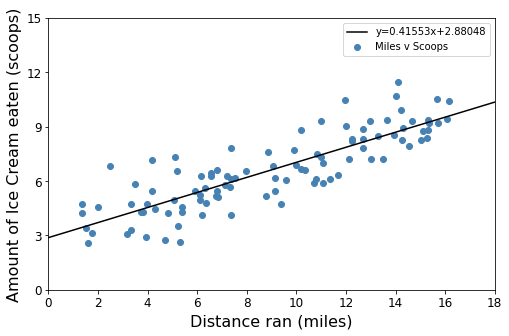

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
ax.scatter(dfTreats["miles"], dfTreats["scoops"], color="steelblue", label = "Miles v Scoops")
ax.set_ylim([0,15]);
plt.xticks(range(0,20,2), fontsize=12)
plt.yticks(np.linspace(0,15,6), fontsize=12);
ax.set_xlabel("Distance ran (miles)", fontsize=16)
ax.set_ylabel("Amount of Ice Cream eaten (scoops)", fontsize=16);

alpha = ahat
beta = bhat
x = np.linspace(0,18,20)
y = alpha+x*beta
line = ax.plot(x,y,color='black',label="y=0.41553x+2.88048")
ax.set_ylim([0,15])
ax.set_xlim([0,18])
plt.legend()

**Part C**: Give a physical interpretation of the coefficients $\hat{\alpha}$ and $\hat{\beta}$, estimated from your model. Is the relationship between run lengths and ice cream consumption positive or negative? Fully justify your responses.

- $\hat{\alpha}$ is the intercept of the true regression line, or the average value of Y when x is zero. In regards to this, $\hat{\alpha}$ is the average number of scoops eaten when Usain doesn't run (me_irl).  
- $\hat{\beta}$ is the slope of the true regression line, or the average change in Y associated with a 1-unit increase of x. In other words, $\hat{\beta}$ is the rate at which the number of scoops increases in association with the distance ran.  
The relationship between distance and scoops is positive because we have a positive slope in our regression line.  

**Part D**: How much ice cream does your simple linear regression model predict the runner will consume if they run a marathon (26.2 miles)? What are potential drawbacks to this model for ice cream consumption?

In [175]:
x = 26.2
y = 0.41553*(x) + 2.88048
print(y)

13.767366


The drawback with this model, is that while it predicts Usain will eat over 13 scoops of ice cream, that is a whole lot of ice cream, and may not be a realistic prediction since the most he's ever eaten was slighty more than 11 scoops.

**Part E:** Compute a 66% confidence interval for the slope parameter, $\beta$, ***by hand***. This means performing all calculations yourself in Python, as opposed to calling a simple Python function that gives you the result.

In order to compute a 66% confidence interval for the slope parameter $\beta$, we will need to use the following formula:  

$\displaystyle (1-\alpha)*100$% CI: $\displaystyle \hat{\beta} \pm t_{\alpha/2, n-2} * SE(\hat{\beta})$ where $SE(\hat{\beta}) = \sqrt{\frac{\hat{\sigma}^2}{{\sum_i (x_i - \hat{x})^2}}}$

In order to find the variance $\hat{\sigma}^2$, I will first need to find the sum of squared errors, SSE, and divide by the degrees of freedom.  
SSE = $\displaystyle \sum_{i=1}^{n} (y_i - \hat{y_i})^2$  
$\displaystyle \hat{\sigma}^2 = \frac{SSE}{n-2}$  

After solving that, then I just need to solve $SE(\hat{\beta})$ and I can plug the rest of the values in.

In [179]:
x = dfTreats["miles"]
y = dfTreats["scoops"]
yhat = ahat + bhat*x 
SSE = np.sum((y-yhat)**2)
varhat = (SSE / (len(x)-2))
SEbeta = np.sqrt(varhat / np.sum((x-np.mean(x))**2))
alpha = 0.34
t = stats.t.cdf(alpha/2, len(x)-2)
ci = []
ci.append(bhat - t*SEbeta)
ci.append(bhat + t*SEbeta)
print(ci)

[0.40057502617034907, 0.43049122373100696]


**Part F**: Are there any other features you think should be added to the model, making this a *multiple* linear regression model?

Temperature might be a good feature to add, because maybe he eats more ice cream after a run on a hot day vs a run on a cold day. We could also add type of ice cream, because depending on what flavor he has in the fridge, he might eat more if it's his favorite.